In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프 기본 설정하기.
sns.set_style("whitegrid") # 그래프 배경을 하얀색 그리드로 설정합니다.
plt.rcParams["font.family"]='Malgun Gothic' # 맑은 고딕으로 폰트 설정합니다..
plt.rcParams["axes.unicode_minus"]=False # 그래프 마이너스 표기합니다.

# 1. 데이터 둘러보기.

In [3]:
df=pd.read_csv("train.csv")
df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [4]:
df_copy=df.copy()
df_copy.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [5]:
df_copy.columns

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

## 칼럼 설명

* id : 샘플 아이디
* Age : 나이
* TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
* CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급)
* DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
* Occupation : 직업
* Gender : 성별
* NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
* NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
* ProductPitched : 영업 사원이 제시한 상품
* PreferredPropertyStar : 선호 호텔 숙박업소 등급
* MaritalStatus : 결혼여부
* NumberOfTrips : 평균 연간 여행 횟수
* Passport : 여권 보유 여부 (0: 없음, 1: 있음)
* PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
* OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
* NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
* Designation : (직업의) 직급
* MonthlyIncome : 월 급여
* ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

### 범주형 변수 vs 연속형 변수
: 범주형 변수로 나눌 수 있고, 연속형 변수로 통계값을 계산할 수 있습니다.

* 범주형 변수 : id, TypeofContact, CityTire, Occupation, Gender, ProductPitched, PrefferedPropertyStar, MaritalState, Passport, PitchSatisfactionScore, OwnCar, Designation, ProdTaken (13개)
* 연속형 변수 : Age, DurationOfPitch, NumberOfPersonVisition, NumberOfFollowups, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome (7개)

In [6]:
df_copy.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

Age, TypeofContact, DurationOfPitch, NumberOfFollowups, preferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome이 결측치를 가지고 있습니다. 모두 고유한 값에 속하기 때문에, 결측치를 어떻게 처리할 것인지 고민하면서 접근해야합니다.

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [8]:
df_copy.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


In [9]:
df_copy.describe(include="object")

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,1945,1955,1955,1955,1955,1955
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,1379,965,1207,745,949,745


In [12]:
print("고객 인지 방법 : ", df_copy["TypeofContact"].unique())
print("직업 종류 : ", df_copy["Occupation"].unique())
print("성별 : ", df_copy["Gender"].unique()) # Fe Male이 female을 의미하는 것인가?
print("영업 사원이 제시한 상품 : ", df_copy["ProductPitched"].unique())
print("결혼 여부 : ", df_copy["MaritalStatus"].unique()) # 결혼, 싱글, 이혼, 비혼
print("직급 : ", df_copy["Designation"].unique())

고객 인지 방법 :  ['Company Invited' 'Self Enquiry' nan]
직업 종류 :  ['Small Business' 'Salaried' 'Large Business' 'Free Lancer']
성별 :  ['Male' 'Female' 'Fe Male']
영업 사원이 제시한 상품 :  ['Basic' 'Deluxe' 'King' 'Standard' 'Super Deluxe']
결혼 여부 :  ['Married' 'Single' 'Divorced' 'Unmarried']
직급 :  ['Executive' 'Manager' 'VP' 'Senior Manager' 'AVP']


In [13]:
print("주거 중인 도시 등급 : ", df_copy["CityTier"].unique())
print("선호 호텔 숙박 업소 등급 : ", df_copy["PreferredPropertyStar"].unique())
print("영업 사원의 프레젠테이션 만족도 : ", df_copy["PitchSatisfactionScore"].unique())
print("함께 여행을 계획 중인 5세 미만의 어린이 수 : ", df_copy["NumberOfChildrenVisiting"].unique())
print("영업 사원의 프레젠테이션 후 이루어진 후속 조치 수 : ", df_copy["NumberOfFollowups"].unique())
print("고객과 함께 여행을 계획 중인 총 인원 수 : ", df_copy["NumberOfPersonVisiting"].unique())
print("평균 연간 여행 횟수 : ", df_copy["NumberOfTrips"].unique())

주거 중인 도시 등급 :  [1 3 2]
선호 호텔 숙박 업소 등급 :  [ 3.  4.  5. nan]
영업 사원의 프레젠테이션 만족도 :  [1 5 4 3 2]
함께 여행을 계획 중인 5세 미만의 어린이 수 :  [ 1.  0.  2.  3. nan]
영업 사원의 프레젠테이션 후 이루어진 후속 조치 수 :  [ 4.  3.  5.  1.  6.  2. nan]
고객과 함께 여행을 계획 중인 총 인원 수 :  [3 2 4 1 5]
평균 연간 여행 횟수 :  [ 3.  1.  2.  7.  4.  6.  5.  8. nan 19.]


In [14]:
total_count=df_copy.shape[0]*df_copy.shape[1]
total_count

39100

In [15]:
null_count=df_copy.isnull().sum().sum()
null_count

413

In [16]:
print(f"전체 데이터의 개수 : {total_count} 개입니다.")
print(f"전체 결측치는 전체 데이터의 {(null_count/total_count)*100:.2f} %입니다.")

전체 데이터의 개수 : 39100 개입니다.
전체 결측치는 전체 데이터의 1.06 %입니다.


결측치의 개수가 약 1% 정도이기 때문에, 없애고 진행해도 크게 무리가 없을 것 같습니다.

# 2. 데이터 전처리하기.

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

## 2-1. Gender에서 Fe Male을 Female로 변경하기.

In [18]:
df_copy["Gender"].value_counts()

Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

In [19]:
df_copy["Gender"]=df_copy["Gender"].replace("Fe Male", "Female")

In [20]:
df_copy["Gender"].value_counts()

Male      1207
Female     748
Name: Gender, dtype: int64

## 2-2. 숫자형으로 변경하기. 

In [21]:
df_copy["NumberOfFollowups"]=df_copy["NumberOfFollowups"].fillna(0)
df_copy["NumberOfFollowups"].unique()

array([4., 3., 5., 1., 6., 2., 0.])

In [22]:
df_copy["NumberOfFollowups"]=df_copy["NumberOfFollowups"].astype("int64")
df_copy["NumberOfFollowups"].unique() # 0 ~ 6개로 변경하였습니다.

array([4, 3, 5, 1, 6, 2, 0], dtype=int64)

In [23]:
df_copy["DurationOfPitch"].fillna(0, inplace=True)

In [24]:
df_copy["DurationOfPitch"]=df_copy["DurationOfPitch"].astype("int64")
df_copy["DurationOfPitch"].unique()

array([10,  0,  7,  6, 29,  8, 20, 14,  9, 16, 15, 23, 21, 11, 25, 34, 17,
       13, 28, 12, 22, 30, 24, 27, 31, 35, 32, 33, 36, 19, 26, 18,  5],
      dtype=int64)

In [25]:
df_copy["NumberOfTrips"].fillna(0, inplace=True)

In [26]:
df_copy["NumberOfTrips"]=df_copy["NumberOfTrips"].astype("int64")
df_copy["NumberOfTrips"].unique()

array([ 3,  1,  2,  7,  4,  6,  5,  8,  0, 19], dtype=int64)

In [27]:
df_copy["PreferredPropertyStar"].unique()

array([ 3.,  4.,  5., nan])

In [28]:
df_copy.dtypes

id                            int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch               int64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups             int64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips                 int64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
ProdTaken                     int64
dtype: object

Age는 고유 값이기 때문에 일단 놔두고 생각해보도록 하겠습니다.

## 2-3. 카테고리로 변경하기.

In [29]:
df_copy["TypeofContact"].fillna("unknown", inplace=True)

In [30]:
df_copy["TypeofContact"].unique()

array(['Company Invited', 'Self Enquiry', 'unknown'], dtype=object)

In [31]:
df_copy["TypeofContact"]=df_copy["TypeofContact"].astype("category")

In [32]:
df_copy.dtypes

id                             int64
Age                          float64
TypeofContact               category
CityTier                       int64
DurationOfPitch                int64
Occupation                    object
Gender                        object
NumberOfPersonVisiting         int64
NumberOfFollowups              int64
ProductPitched                object
PreferredPropertyStar        float64
MaritalStatus                 object
NumberOfTrips                  int64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                   object
MonthlyIncome                float64
ProdTaken                      int64
dtype: object

In [33]:
df_copy.isnull().sum()

id                            0
Age                          94
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

나머지는 고유한 값이라고 판단되어, 일단은 그대로 냅두기로 하였습니다.

## 2-4. 칼럼 명 모두 소문자로 변경하기.

데이터 분석 시에 칼럼 명이 소문자인 경우가 훨씬 더 편리하기 때문이다.

In [34]:
df_copy.columns=df_copy.columns.str.lower()

In [35]:
df_copy.columns

Index(['id', 'age', 'typeofcontact', 'citytier', 'durationofpitch',
       'occupation', 'gender', 'numberofpersonvisiting', 'numberoffollowups',
       'productpitched', 'preferredpropertystar', 'maritalstatus',
       'numberoftrips', 'passport', 'pitchsatisfactionscore', 'owncar',
       'numberofchildrenvisiting', 'designation', 'monthlyincome',
       'prodtaken'],
      dtype='object')

# 3. EDA & Visualization

## 3-1. 남녀 별, 나이 대 별 직업 분포 알아보기.

In [36]:
df_copy.head()

,id,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,productpitched,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome,prodtaken
0,1,28.0,Company Invited,1,10,Small Business,Male,3,4,Basic,3.0,Married,3,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,0,Small Business,Female,2,4,Deluxe,4.0,Single,1,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,0,Salaried,Male,2,3,Deluxe,4.0,Married,2,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7,Small Business,Male,3,5,Basic,4.0,Married,3,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6,Salaried,Male,2,3,Deluxe,3.0,Divorced,2,0,3,1,0.0,Manager,19907.0,0


In [37]:
df_copy["age"].unique()

array([28., 34., 45., 29., 42., 32., 43., 36., 35., 31., 49., nan, 52.,
       33., 22., 50., 23., 41., 37., 40., 56., 54., 39., 20., 46., 27.,
       38., 25., 26., 24., 30., 21., 51., 47., 55., 44., 53., 48., 18.,
       57., 60., 59., 19., 58., 61.])

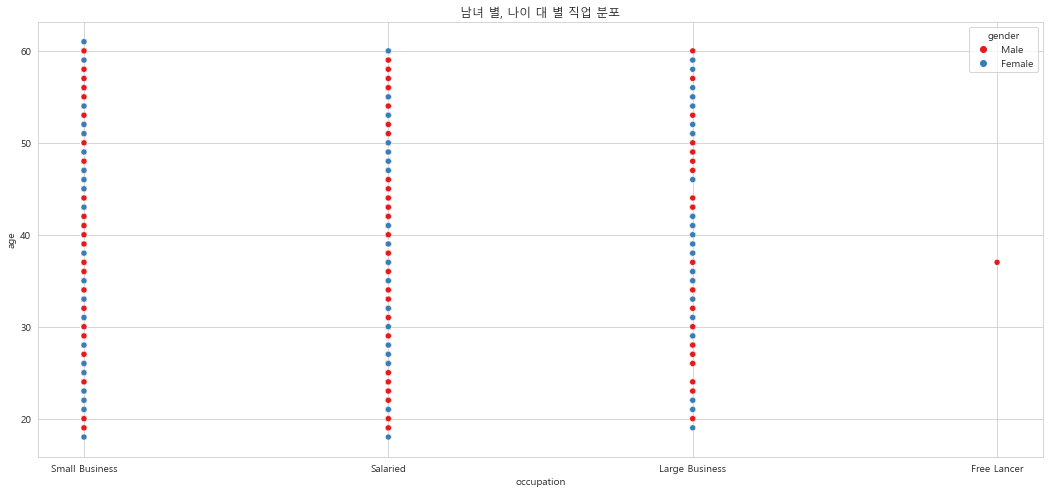

In [36]:
fig, ax=plt.subplots(figsize=(18,8))

_=sns.scatterplot(data=df_copy, x="occupation", y="age", hue="gender", palette="Set1")
_=plt.title("남녀 별, 나이 대 별 직업 분포")
fig.savefig("./images/남녀 별, 나이 대 별 직업 분포.png", dpi=200, facecolor="#E6E9EE")

In [38]:
df_copy["occupation"].value_counts()

Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: occupation, dtype: int64

In [39]:
df1=df_copy[["occupation", "gender"]].groupby(["occupation", "gender"]).size().reset_index()
df1.columns=["occupation", "gender", "number"]
df1

,occupation,gender,number
0,Free Lancer,Male,1
1,Large Business,Female,68
2,Large Business,Male,95
3,Salaried,Female,360
4,Salaried,Male,605
5,Small Business,Female,320
6,Small Business,Male,506


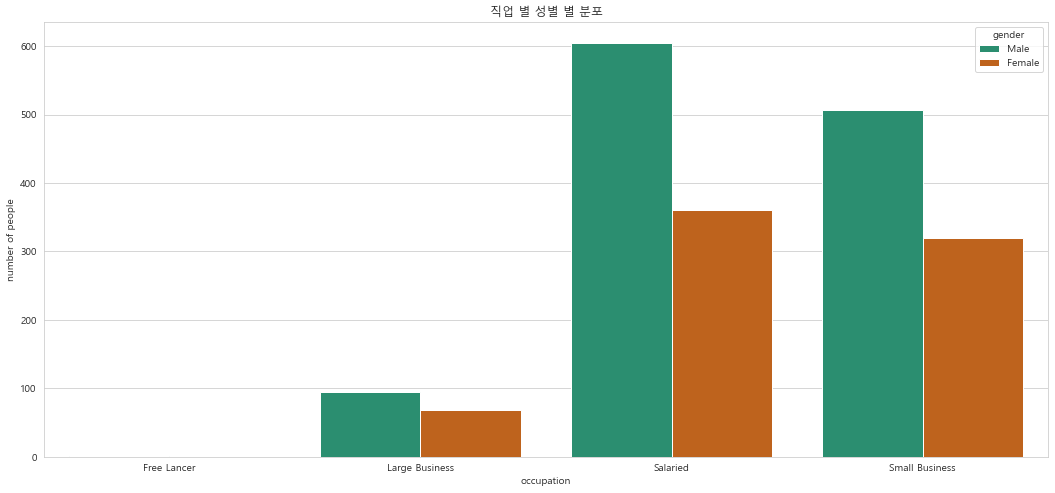

In [39]:
fig, ax=plt.subplots(figsize=(18,8))

_=sns.barplot(data=df1, x="occupation", y="number", hue="gender", palette="Dark2")
_=plt.title("직업 별 성별 별 분포")
_=plt.ylabel("number of people")
fig.savefig("./images/직업 별 성별 별 분포.png", dpi=200, facecolor="#E6E9EE")

프래랜서는 30 ~ 40대 남성 딱 1명 뿐입니다. 그리고 샐러리 맨이 가장 많았고, 그 다음에는 소규모 사업가, 대규모 사업가 순으로 이루어져 있습니다. 3개 직업 모두 10대 후반 부터 60대 초반까지 골고루 퍼져있음을 알 수 있습니다. 즉, 특정 나이 대에 몰려있는 직업군은 따로 없는 것으로 보여집니다. 또한, 3개 직업 모두 여성보다는 남성이 많은 것으로 보여지고 있습니다.

## 3-2. 남녀 별, 나이 대 별 월급 분포 알아보기.

In [40]:
df_copy.head()

,id,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,productpitched,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome,prodtaken
0,1,28.0,Company Invited,1,10,Small Business,Male,3,4,Basic,3.0,Married,3,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,0,Small Business,Female,2,4,Deluxe,4.0,Single,1,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,0,Salaried,Male,2,3,Deluxe,4.0,Married,2,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7,Small Business,Male,3,5,Basic,4.0,Married,3,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6,Salaried,Male,2,3,Deluxe,3.0,Divorced,2,0,3,1,0.0,Manager,19907.0,0


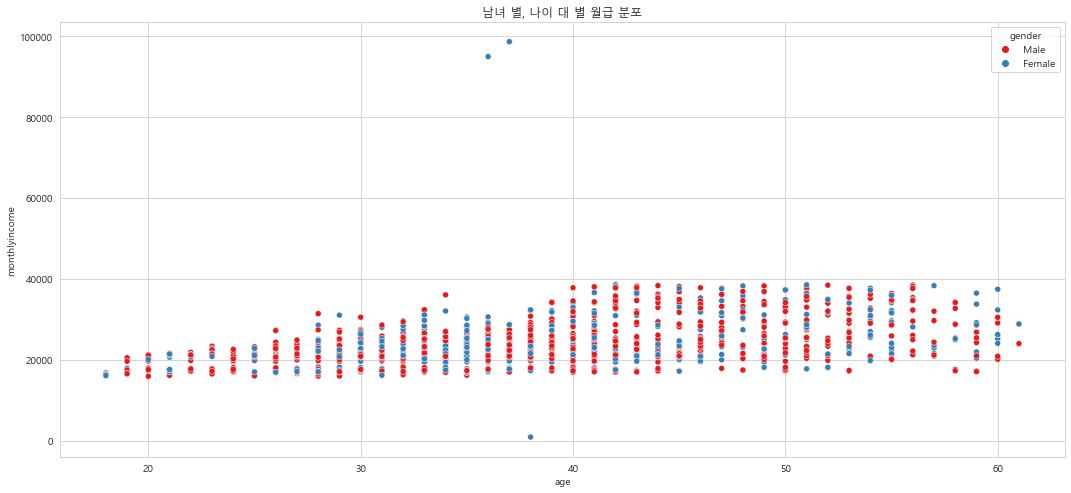

In [41]:
fig, ax=plt.subplots(figsize=(18,8))

_=sns.scatterplot(data=df_copy, x="age", y="monthlyincome", hue="gender", palette="Set1")
_=plt.title("남녀 별, 나이 대 별 월급 분포")
fig.savefig("./images/남녀 별, 나이 대 별 월급 분포.png", dpi=200, facecolor="#E6E9EE")

위의 그래프를 보면, 대부분의 사람들은 월급이 16000 이상 ~ 40000 미만으로 이루어져 있습니다. 그리고 여성 분들 중에서 굉장히 잘 버시거나 돈을 거의 벌지 못 하시는 분이 3명 계시고, 이것은 이상점으로 판단해도 괜찮을 것 같습니다. 50대 후반 까지는 대체로 남성이 더 잘 버는 편이고, 그 다음부터는 대체로 여성이 더 잘 버는 편입니다.

In [41]:
df_copy.loc[df_copy["age"]<30, "monthlyincome"].min()

16009.0

## 3-3. 남녀 별, 직업 별 월급 분포 알아보기.

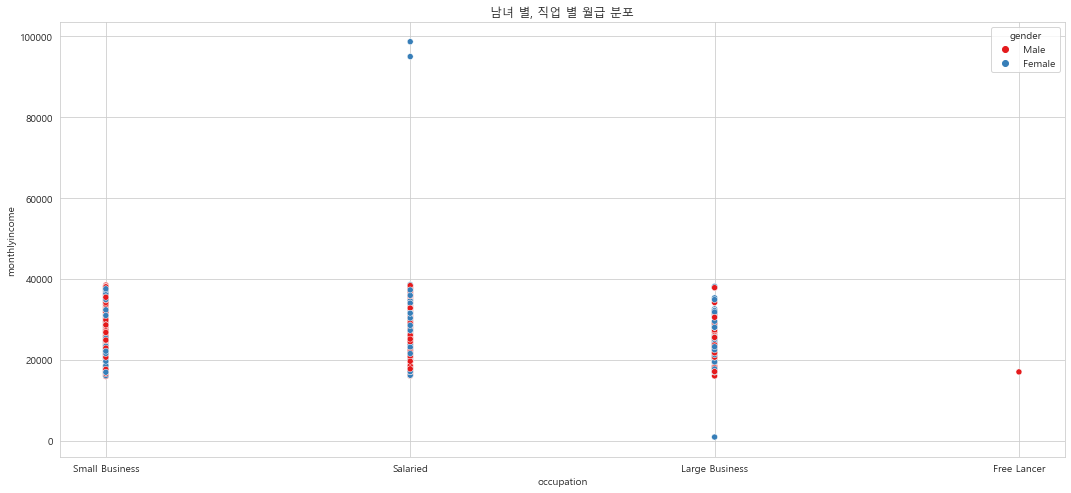

In [43]:
fig, ax=plt.subplots(figsize=(18,8))

_=sns.scatterplot(data=df_copy, x="occupation", y="monthlyincome", hue="gender", palette="Set1")
_=plt.title("남녀 별, 직업 별 월급 분포")
fig.savefig("./images/남녀 별, 직업 별 월급 분포.png", dpi=200, facecolor="#E6E9EE")

이상점을 가진 직업을 찾았습니다. 굉장히 돈을 잘 버시는 여성분 2명은 샐러리맨이였고, 돈을 거의 못 버시던 여성분은 대규모 사업가였습니다. 4개 직업 모두 대체로 15000 이상 ~ 40000 미만의 월급을 받고 있습니다. 

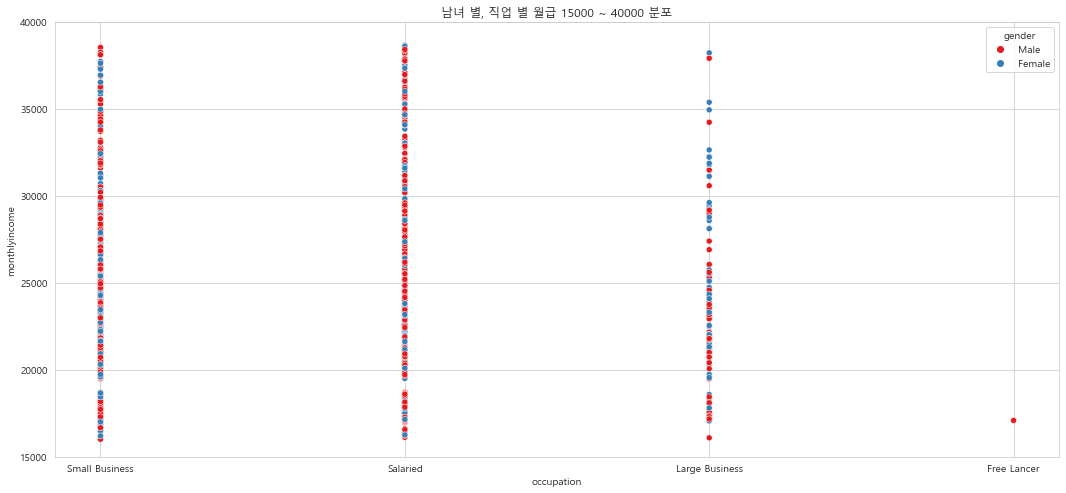

In [44]:
fig, ax=plt.subplots(figsize=(18,8))

_=sns.scatterplot(data=df_copy, x="occupation", y="monthlyincome", hue="gender", palette="Set1")
_=plt.title("남녀 별, 직업 별 월급 15000 ~ 40000 분포")
_=plt.ylim(15000, 40000)
fig.savefig("./images/남녀 별, 직업 별 월급 15000 ~ 40000 분포.png", dpi=200, facecolor="#E6E9EE")

소규모 사업가와 샐러리맨이 대규모 사업가보다 좀 더 빼곡하게 월급 분포에 자리잡고 있음을 알 수 있습니다.

## 3-4. 영업 사원이 제시한 상품 별 여행 인원 수 분포 알아보기.

In [42]:
df2=df_copy[["productpitched", "numberofpersonvisiting"]].groupby(["productpitched"]).sum().reset_index()
df2

,productpitched,numberofpersonvisiting
0,Basic,2207
1,Deluxe,2011
2,King,258
3,Standard,874
4,Super Deluxe,364


In [43]:
df3=df_copy[["productpitched", "numberofchildrenvisiting"]].groupby(["productpitched"]).sum().reset_index()
df3

,productpitched,numberofchildrenvisiting
0,Basic,916.0
1,Deluxe,834.0
2,King,104.0
3,Standard,357.0
4,Super Deluxe,128.0


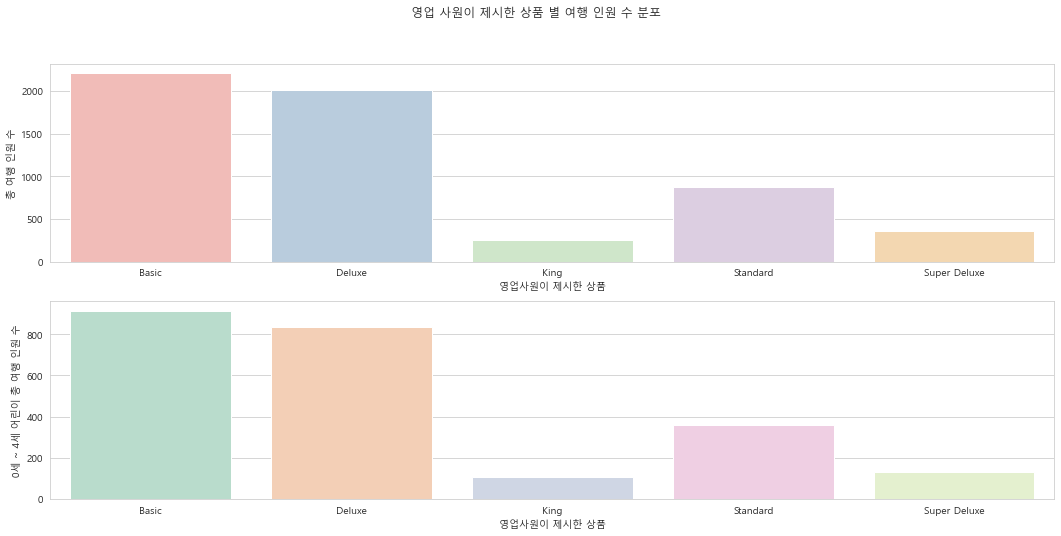

In [47]:
fig, ax=plt.subplots(2, 1, figsize=(18,8))

_=sns.barplot(data=df2, x="productpitched", y="numberofpersonvisiting", ax=ax[0], palette="Pastel1")
_=ax[0].set_ylabel("총 여행 인원 수")
_=ax[0].set_xlabel("영업사원이 제시한 상품")

_=sns.barplot(data=df3, x="productpitched", y="numberofchildrenvisiting", ax=ax[1], palette="Pastel2")
_=ax[1].set_ylabel("0세 ~ 4세 어린이 총 여행 인원 수")
_=ax[1].set_xlabel("영업사원이 제시한 상품")

_=plt.suptitle("영업 사원이 제시한 상품 별 여행 인원 수 분포")
fig.savefig("./images/영업 사원이 제시한 상품 별 여행 인원 수 분포.png", dpi=200, facecolor="#E6E9EE")

일단 영업 사원이 제시한 상품은 Basic이 가장 많고, King이 가장 적습니다. 대부분의 사람들은 Basic이나 Deluxe 상품으로 여행을 추천 받고 있습니다. 어린 아이를 데리고 가는 가족들은 어떤 상품으로 여행을 가는지 알아보고 싶어서 체크해보았는데, 위와 같은 경향으로 여행을 추천 받고 있습니다.

## 3-5. 결혼 여부에 따른 영업 사원이 제시한 상품 별 여행 인원 수 분포 알아보기.

In [44]:
df_copy.head()

,id,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,productpitched,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome,prodtaken
0,1,28.0,Company Invited,1,10,Small Business,Male,3,4,Basic,3.0,Married,3,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,0,Small Business,Female,2,4,Deluxe,4.0,Single,1,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,0,Salaried,Male,2,3,Deluxe,4.0,Married,2,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7,Small Business,Male,3,5,Basic,4.0,Married,3,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6,Salaried,Male,2,3,Deluxe,3.0,Divorced,2,0,3,1,0.0,Manager,19907.0,0


In [45]:
df4=df_copy[["productpitched", "numberofpersonvisiting", "maritalstatus"]].groupby(["productpitched", "maritalstatus"]).sum().reset_index()
df4

,productpitched,maritalstatus,numberofpersonvisiting
0,Basic,Divorced,372
1,Basic,Married,1012
2,Basic,Single,520
3,Basic,Unmarried,303
4,Deluxe,Divorced,388
5,Deluxe,Married,1016
6,Deluxe,Single,206
7,Deluxe,Unmarried,401
8,King,Divorced,60
9,King,Married,146


In [46]:
df5=df_copy[["productpitched", "numberofchildrenvisiting", "maritalstatus"]].groupby(["productpitched", "maritalstatus"]).sum().reset_index()
df5

,productpitched,maritalstatus,numberofchildrenvisiting
0,Basic,Divorced,149.0
1,Basic,Married,412.0
2,Basic,Single,201.0
3,Basic,Unmarried,154.0
4,Deluxe,Divorced,160.0
5,Deluxe,Married,427.0
6,Deluxe,Single,54.0
7,Deluxe,Unmarried,193.0
8,King,Divorced,25.0
9,King,Married,60.0


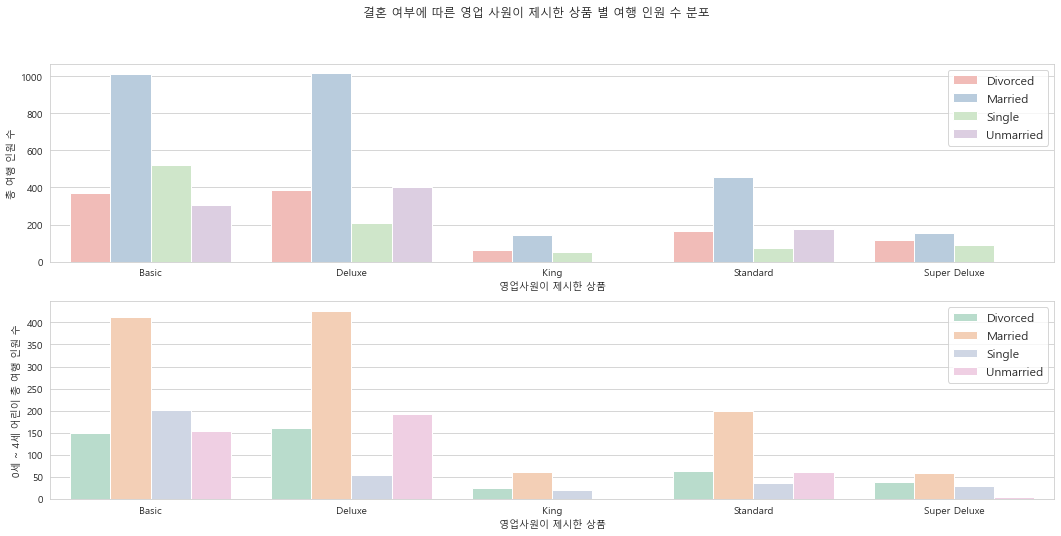

In [51]:
fig, ax=plt.subplots(2, 1, figsize=(18,8))

_=sns.barplot(data=df4, x="productpitched", y="numberofpersonvisiting", ax=ax[0], palette="Pastel1", hue="maritalstatus")
_=ax[0].set_ylabel("총 여행 인원 수")
_=ax[0].set_xlabel("영업사원이 제시한 상품")
_=ax[0].legend(fontsize=12)

_=sns.barplot(data=df5, x="productpitched", y="numberofchildrenvisiting", ax=ax[1], palette="Pastel2", hue="maritalstatus")
_=ax[1].set_ylabel("0세 ~ 4세 어린이 총 여행 인원 수")
_=ax[1].set_xlabel("영업사원이 제시한 상품")
_=ax[1].legend(fontsize=12)

_=plt.suptitle("결혼 여부에 따른 영업 사원이 제시한 상품 별 여행 인원 수 분포")
fig.savefig("./images/결혼 여부에 따른 영업 사원이 제시한 상품 별 여행 인원 수 분포.png", dpi=200, facecolor="#E6E9EE")

결혼 여부에 따른 영업 사원이 제시한 상품 별 여행 인원 수의 분포도 알아보았습니다. 일단 결혼하신 분들은 Basic 보다는 Deluxe를 좀 더 직원들이 추천하는 분위기 입니다.
전체적으로 봤을 때에는 Basic을 더 추천하는 편입니다.

## 3-6. 고객의 제품 인지 방법 별 인원 수 분포

In [47]:
df6=df_copy[["typeofcontact", "id"]].groupby(["typeofcontact"]).count().reset_index()
df6

,typeofcontact,id
0,Company Invited,566
1,Self Enquiry,1379
2,unknown,10


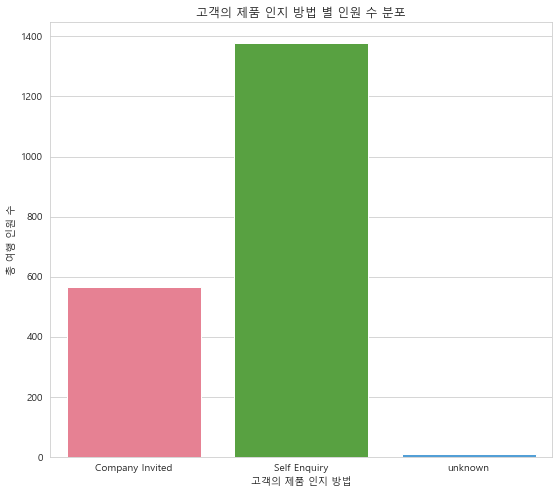

In [72]:
fig, ax= plt.subplots(figsize=(9,8))

_=sns.barplot(data=df6, x="typeofcontact", y="id", palette="husl")
_=plt.title("고객의 제품 인지 방법 별 인원 수 분포")
_=plt.ylabel("총 여행 인원 수")
_=plt.xlabel("고객의 제품 인지 방법")
fig.savefig("./images/고객의 제품 인지 방법 별 인원 수 분포.png", dpi=200, facecolor="#E6E9EE")

In [48]:
df_copy["typeofcontact"].value_counts()

Self Enquiry       1379
Company Invited     566
unknown              10
Name: typeofcontact, dtype: int64

직접 찾아본 사람의 수가 압도적으로 많은 편에 속합니다. 직접 방문 보다는 인터넷 검색이 많기 때문에, 온라인 위주로 홍보하는 것이 좋겠습니다. (여행 상품 홈페이지 개설 및 업데이트, 여행 카페 등에 홍보글 올리기 등등)

## 3-7. 영업 사원이 고객에게 제공하는 프레젠테이션 기간 별 횟수 분포

In [49]:
mean_duration=df_copy["durationofpitch"].mean()
mean_duration

14.714066496163683

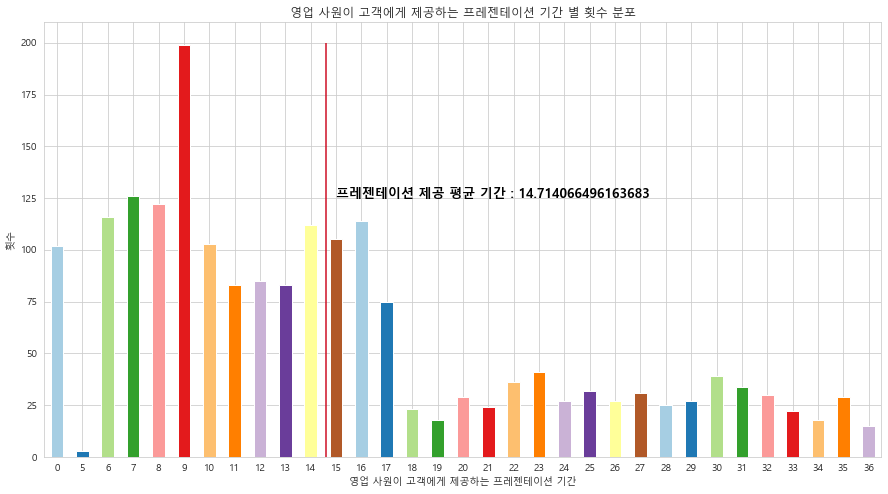

In [54]:
colors=sns.color_palette("Paired", df_copy["durationofpitch"].nunique())
_=df_copy["durationofpitch"].value_counts().sort_index().plot.bar(figsize=(15,8), color=colors)

_=plt.title("영업 사원이 고객에게 제공하는 프레젠테이션 기간 별 횟수 분포")
_=plt.xlabel("영업 사원이 고객에게 제공하는 프레젠테이션 기간")
_=plt.ylabel("횟수")
_=plt.xticks(rotation=0) # xticklabels 대신에 xticks 이용하기.
_=plt.vlines(10.6, 0, 200, color="#CD0C22")
_=plt.text(11, 125, f"프레젠테이션 제공 평균 기간 : {mean_duration}", color="black", fontdict={"fontsize":13, "fontweight":"bold"})
plt.savefig("./images/영업 사원이 고객에게 제공하는 프레젠테이션 기간 별 횟수 분포.png", dpi=200, facecolor="#E6E9EE")

기간이 9인 경우가 가장 많고, 5인 경우가 가장 적었습니다. 프레젠테이션 제공 기간은 약 15일 정도 됩니다. 9일인 경우는 200회에 근접하고 5일인 경우는 거의 없습니다.

## 3-8. 남녀 별 영업 사원이 고객에게 제공하는 프레젠테이션 기간 별 평균 만족도 분포

In [55]:
df_copy.head()

,id,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,productpitched,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome,prodtaken
0,1,28.0,Company Invited,1,10,Small Business,Male,3,4,Basic,3.0,Married,3,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,0,Small Business,Female,2,4,Deluxe,4.0,Single,1,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,0,Salaried,Male,2,3,Deluxe,4.0,Married,2,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7,Small Business,Male,3,5,Basic,4.0,Married,3,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6,Salaried,Male,2,3,Deluxe,3.0,Divorced,2,0,3,1,0.0,Manager,19907.0,0


In [91]:
df7=df_copy[["durationofpitch", "pitchsatisfactionscore", "gender"]].groupby(["durationofpitch", "gender"]).mean().reset_index()
df7

,durationofpitch,gender,pitchsatisfactionscore
0,0,Female,2.936170
1,0,Male,3.290909
2,5,Female,1.000000
3,5,Male,4.000000
4,6,Female,2.921569
...,...,...,...
61,34,Male,3.714286
62,35,Female,3.230769
63,35,Male,3.312500
64,36,Female,3.600000


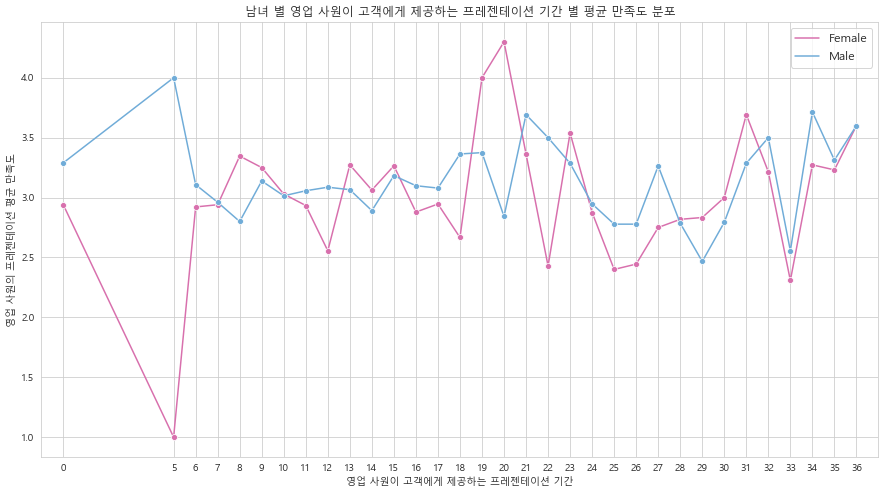

In [107]:
fig, ax=plt.subplots(figsize=(15,8))
color=["#D870AD", "#70ACD8"]
colorlist=sns.color_palette(color)

_=sns.lineplot(data=df7, x="durationofpitch", y="pitchsatisfactionscore", ax=ax, palette=colorlist, hue="gender", marker="o")
_=ax.set_xticks(list(df7["durationofpitch"].unique()))
_=ax.set_xlim(-1, 37)
_=plt.title("남녀 별 영업 사원이 고객에게 제공하는 프레젠테이션 기간 별 평균 만족도 분포")
_=plt.xlabel("영업 사원이 고객에게 제공하는 프레젠테이션 기간")
_=plt.ylabel("영업 사원의 프레젠테이션 평균 만족도")
_=plt.legend(fontsize=12)
fig.savefig("./images/남녀 별 영업 사원이 고객에게 제공하는 프레젠테이션 기간 별 평균 만족도 분포.png", dpi=200, facecolor="#E6E9EE")

기간이 5인 경우에 여성의 평균 만족도가 많이 떨어져있음을 알 수 있습니다. 대부분의 평균 만족도는 2.5 ~ 4.0 사이입니다. 1 ~ 4 기간은 결과 값이 없기 때문에 알 수 없습니다. 기간과 관계 없이 평균 만족도는 들쑥날쑥한 편입니다.

In [141]:
print("영업 사원 평균 만족도는", df_copy["pitchsatisfactionscore"].mean(), "이다.")
print("영업 사원의 평균 후속 조치 수는", df_copy["numberoffollowups"].mean(), "이다.")

영업 사원 평균 만족도는 3.067519181585678 이다.
영업 사원의 평균 후속 조치 수는 3.693606138107417 이다.


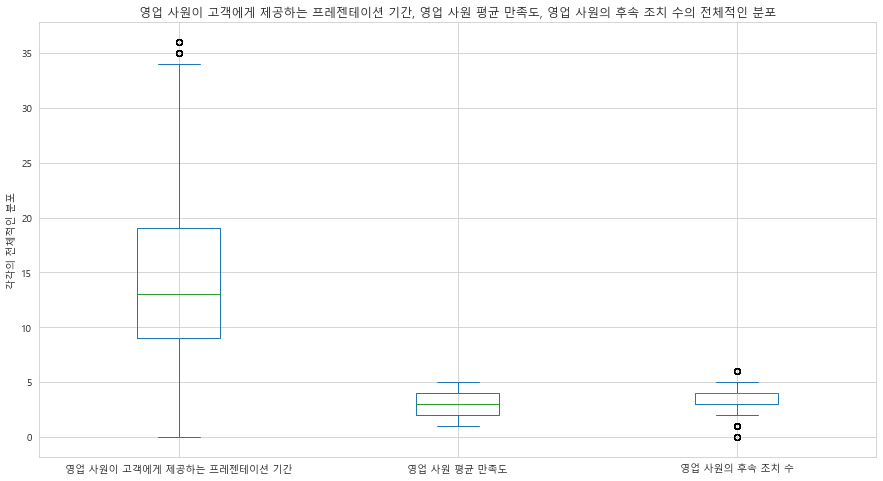

In [148]:
_=df_copy[["durationofpitch", "pitchsatisfactionscore", "numberoffollowups"]].plot.box(figsize=(15,8))

values=["영업 사원이 고객에게 제공하는 프레젠테이션 기간", "영업 사원 평균 만족도", "영업 사원의 후속 조치 수"] # 변경 값 적어주기.
x=[1,2,3] # 변경 위치 적어주기.
_=plt.xticks(x, values) # 변경시켜주기.
_=plt.ylabel("각각의 전체적인 분포")
_=plt.title("영업 사원이 고객에게 제공하는 프레젠테이션 기간, 영업 사원 평균 만족도, 영업 사원의 후속 조치 수의 전체적인 분포")
plt.savefig("./images/영업 사원이 고객에게 제공하는 프레젠테이션 기간, 영업 사원 평균 만족도, 영업 사원의 후속 조치 수의 전체적인 분포.png", dpi=200, facecolor="#E6E9EE")

평균 만족도는 약 3.06 정도 되고, 후속 조치 수는 약 3.67 번 정도 되는 편입니다. 각각의 전체적인 분포를 알아볼 수 있습니다.

## 3-9. 영업 사원이 제공하는 프레젠테이션 기간에서의 평균 만족도와 평균 후속 조치수의 분포

In [153]:
df8=df_copy[["durationofpitch", "pitchsatisfactionscore", "numberoffollowups"]].groupby(["durationofpitch"]).mean().reset_index()
df8

,durationofpitch,pitchsatisfactionscore,numberoffollowups
0,0,3.127451,3.343137
1,5,3.000000,3.666667
2,6,3.025862,3.189655
3,7,2.952381,4.230159
4,8,3.032787,3.262295
5,9,3.180905,3.944724
6,10,3.019417,3.699029
7,11,3.012048,3.662651
8,12,2.917647,3.600000
9,13,3.120482,3.626506


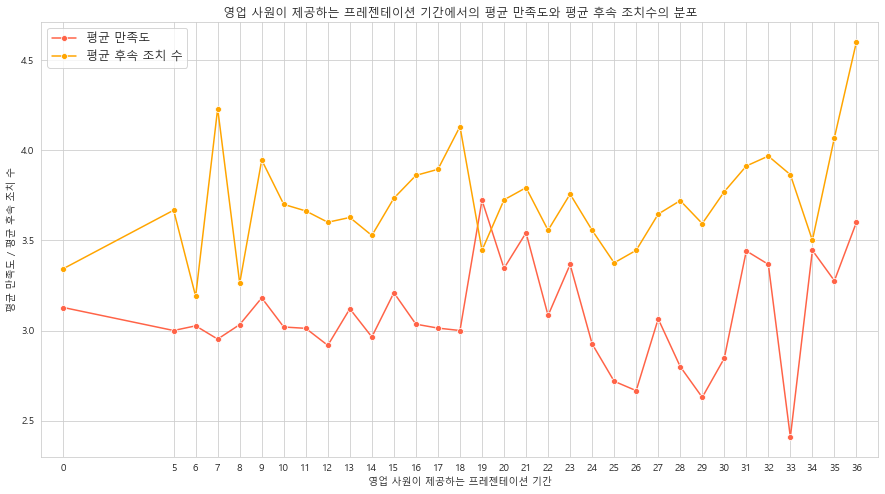

In [176]:
fig, ax=plt.subplots(figsize=(15,8))

_=sns.lineplot(data=df8, x="durationofpitch", y="pitchsatisfactionscore", label="평균 만족도", marker="o", color="tomato")
_=sns.lineplot(data=df8, x="durationofpitch", y="numberoffollowups", label="평균 후속 조치 수", marker="o", color="orange")
_=plt.legend(fontsize=12)
_=ax.set_xticks(list(df8["durationofpitch"].unique()))
_=ax.set_xlim(-1,37)
_=plt.ylabel("평균 만족도 / 평균 후속 조치 수")
_=plt.xlabel("영업 사원이 제공하는 프레젠테이션 기간")
_=plt.title("영업 사원이 제공하는 프레젠테이션 기간에서의 평균 만족도와 평균 후속 조치수의 분포")
plt.savefig("./images/영업 사원이 제공하는 프레젠테이션 기간에서의 평균 만족도와 평균 후속 조치수의 분포.png", dpi=200, facecolor="#E6E9EE")

기간 20 이후에는 평균 만족도와 평균 후속 조치수가 대체로 비슷한 경향으로 (33 ~ 35 사이 제외) 가고 있습니다. 예를 들면 평균 만족도가 높을 때에 평균 후속 조치 수가 높은 편에 속하고 있습니다. 20 이전에는 딱히 그런 경향성을 보이지는 않습니다. 그리고 전체적으로 평균 만족도 보다 후속 조치수의 평균이 더 높음을 알 수 있습니다.

## 3-10.